# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

import nsfg

## Examples from Chapter 1

Read NSFG data into a Pandas DataFrame.

In [2]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [3]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [4]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [5]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [6]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [7]:
pregordr[0]

1

Select a slice from a column.

In [8]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [9]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [10]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

Check the values of another variable.

In [11]:
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [12]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1])

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [15]:
preg['birthord'].value_counts(dropna=0)

NaN     4445
1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

We can also use `isnull` to count the number of nans.

In [14]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [16]:
preg['prglngth'].value_counts(dropna=0)

39    4744
40    1120
38     609
9      594
41     591
6      543
37     457
13     446
4      412
8      409
35     357
36     329
42     328
17     253
11     202
30     198
5      181
7      175
12     170
3      151
43     148
22     147
10     137
32     122
26     117
2       78
34      60
33      50
44      46
16      44
15      39
28      38
21      37
19      34
24      31
31      29
14      29
29      23
20      18
18      17
0       15
25      15
23      12
45      10
1        9
27       8
48       7
50       2
46       1
47       1
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [17]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [17]:
# Solution goes here

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [18]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [19]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [20]:
resp.shape

(7643, 3087)

Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [22]:
resp['age_r'].value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [23]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [24]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750


How old is the respondent with `caseid` 1?

In [26]:
resp[resp.caseid==1]['age_r']

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [29]:
preg[preg.caseid==2298]['prglngth']

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [31]:
preg[preg.caseid==2298]['birthwgt_lb']

2610    6.0
2611    5.0
2612    4.0
2613    6.0
Name: birthwgt_lb, dtype: float64

In [39]:
import pandas as pd
pd.set_option('display.max_rows', 500)


preg[preg['outcome']==1].groupby(['pregnum','prglngth']).agg({'caseid':'count'})

caseid
pregnum prglngth        
1       22             1
        23             1
        24             1
        26             2
        28             3
        29             1
        30            10
        31             2
        32            12
        33             3
        34             4
        35            27
        36            35
        37            47
        38            61
        39           412
        40            99
        41            72
        42            38
        43            15
        44             3
        45             1
        47             1
2       20             1
        21             1
        22             2
        24             1
        25             1
        26             4
        27             1
        28             9
        29             6
        30            22
        31             5
        32            28
        33            17
        34            14
        35            80
        36            81
        37           106
        38           142
        39          1071
        40           307
        41           172
        42            68
        43            29
        44            17
        45             1
        48             2
        50             1
3       0              1
        4              1
        17             1
        22             3
        24             3
        26            12
        28             8
        29             2
        30            45
        31             9
        32            22
        33            10
        34            16
        35            79
        36            84
        37           124
        38           173
        39          1219
        40           277
        41           148
        42            96
        43            46
        44            17
        45             5
4       17             1
        19             1
        24             1
        26             5
        27             1
        28             5
        29             3
        30            24
        31             5
        32            25
        33             6
        34            17
        35            61
        36            46
        37            91
        38           132
        39           818
        40           195
        41            89
        42            55
        43            20
        44             5
        45             2
        46             1
        48             2
        50             1
5       21             1
        24             5
        25             2
        26             6
        28             5
        29             2
        30            18
        31             4
        32            15
        33             5
        34             3
        35            33
        36            34
        37            50
        38            55
        39           489
        40           124
        41            43
        42            30
        43            22
        44             2
        48             2
6       9              1
        18             1
        26             2
        27             1
        29             1
        30             5
        32             6
        33             2
        34             4
        35             8
        36            20
        37            22
        38            21
        39           310
        40            55
        41            20
        42            21
        43            10
        44             1
        45             1
7       13             1
        24             2
        26             3
        28             1
        30             4
        31             1
        32             1
        33             4
        35            16
        36            10
        37            10
        38            13
        39           160
        40            35
        41            24
        42             5
        43        

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

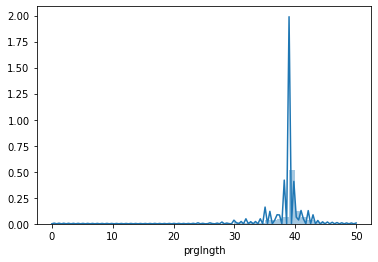

In [50]:
sns.distplot(preg[preg['outcome']==1]['prglngth'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

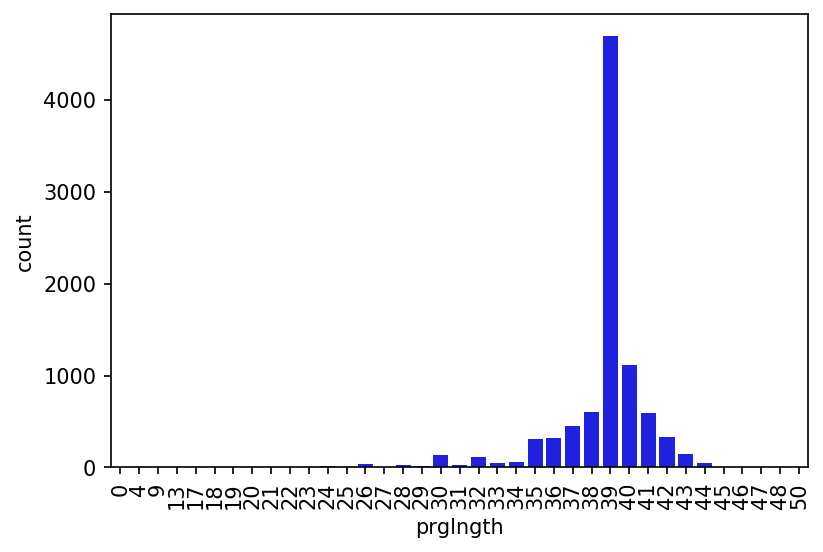

In [54]:
plt.figure(dpi=150)
sns.countplot(preg['prglngth'][preg['outcome']==1],color='b')
plt.xticks(rotation=90)


In [56]:
preg[(preg['outcome']==1)&(preg['prglngth']==0)]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
6458,5849,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,1668.122256,2050.251974,3557.187175,2,46,NaN,8.0


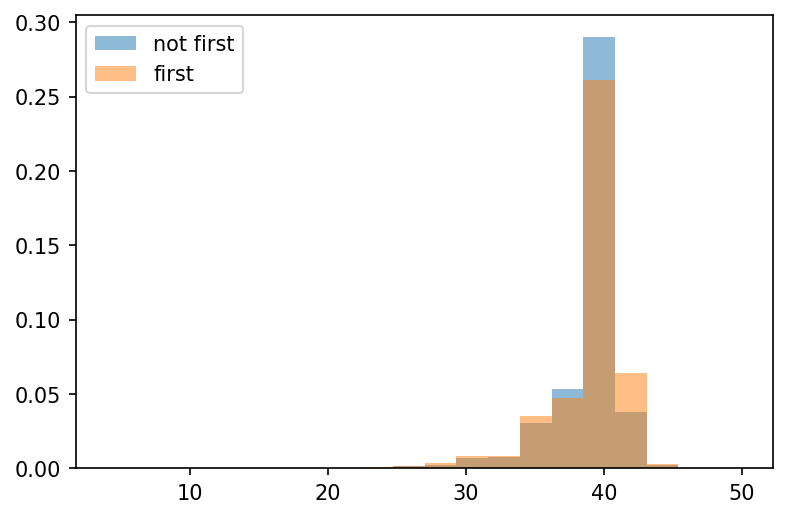

In [63]:
l = preg[preg['outcome']==1]

plt.figure(dpi=150)
_,b,_=plt.hist(l[l['birthord']!=1]['prglngth'],bins=20,alpha=0.5,label='not first',density=1)
plt.hist(l[l['birthord']==1]['prglngth'],bins=b,alpha=0.5,label='first',density=1)
plt.legend()
